## **IMPORTS**

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

import module.feature_selection as feature_selection
import module.visualization as visualization
import module.classification_model as classification_model

from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier as rfc

In [2]:
%%capture
%run data_preprocessing.ipynb

## **RANDOM FORESTS**

In [3]:
# Salvo le Features in variabili indicative per Random Forests
rf_X_train = X_train_smote.copy()
rf_X_test = X_test.copy()

### **Feature Selection**
Per garantire la **comparabilità tra i risultati dei modelli** e **aumentare le performance della Random Forests**, effettuiamo un'operazione di **Feature Selection** con **SKB** e **RFE**.

In [4]:
# Inizializzo il modello di Random Forests
random_forests = rfc(random_state = 42)

Con **calculate_accuracy()**, calcoliamo l'accuracy del modello sui **dati di train** con le Features selezionate dai rispettivi algoritmi di Feature Selection.

In [5]:
# Calcolo le accuracy di Random Forests con SKB
rf_skb_accuracies = feature_selection.calculate_accuracy('skb', random_forests, rf_X_train, y_train_smote)

100%|██████████| 22/22 [00:11<00:00,  1.93it/s]

Riserve utili su attivo totale: 0.7555878084179971
Valore Netto per Azione (A): 0.8016690856313498
Capitale proprio/Passività: 0.8513788098693761
Tasso di flusso di cassa: 0.8551523947750364
Margine Lordo Operativo: 0.8589259796806967
Flusso di cassa per azione: 0.8588896952104499
Profitto operativo per persona: 0.8683599419448477
Aliquota fiscale (A): 0.8664731494920174
Debito totale/ Patrimonio netto totale: 0.8703193033381712
Rotazione totale degli asset: 0.8608127721335268
Percentuale di reinvestimento del contante: 0.874165457184325
Tasso di interesse netto dopo le tasse: 0.8760885341074021
Crediti in sospeso/Patrimonio netto: 0.8723149492017417
Tasso crescita valore netto: 0.8780116110304789
Tasso di crescita dell'utile operativo: 0.8722060957910015
Aliquota degli interessi sul debito: 0.8779753265602321
Debito a lungo termine su attività correnti: 0.8836719883889697
Livello di idoneità dei fondi a lungo termine (A): 0.8875544267053701
Tasso di Spesa Operativa: 0.8779390420899855

In [6]:
# Calcolo le accuracy di Random Forests con RFE
rf_rfe_accuracies = feature_selection.calculate_accuracy('rfe', random_forests, rf_X_train, y_train_smote)

100%|██████████| 22/22 [00:53<00:00,  2.45s/it]

Riserve utili su attivo totale: 0.7555878084179971
Debito totale/ Patrimonio netto totale: 0.8437590711175617
Tasso di interesse netto dopo le tasse: 0.860921625544267
Capitale proprio/Passività: 0.8475326560232223
Aliquota degli interessi sul debito: 0.8608853410740203
Grado di leva finanziaria (DFL): 0.8685413642960814
Tasso crescita valore netto: 0.8703555878084182
Profitto operativo per persona: 0.8799709724238026
Rotazione totale degli asset: 0.8742380261248186
Tasso di flusso di cassa: 0.8703918722786647
Debito a lungo termine su attività correnti: 0.8818214804063862
Valore Netto per Azione (A): 0.8799346879535559
Percentuale di reinvestimento del contante: 0.8799346879535559
Tasso di crescita dell'utile operativo: 0.8780116110304789
Tasso di Spesa Operativa: 0.8817851959361394
Margine Lordo Operativo: 0.8914005805515239
Aliquota fiscale (A): 0.8894412191582003
Indice di Rotazione dell'Attivo Corrente: 0.8837808417997097
Flusso di cassa per azione: 0.8838171262699566
Livello di i

Con **k_accuracy_lineplot()**, visualizzaziamo con lineplot un confronto tra l'accuracy di SKB e l'accuracy di RFE, mettendo in evidenza il **k ottimale**, ovvero il numero di Features selezionate dai rispettivi algoritmi di Feature Selection che aumentano le prestazioni della Random Forests:
- Il k ottimale con **SKB** è **9** per un accuracy pari a **0.8703**
- Il k ottimale con **RFE** è **8** per un accuracy pari a **0.88**

Come nei modelli precedenti, il **k ottimale** viene scelto ad occhio per garantire un **corretto trade-off tra complessità e generalizzazione**.

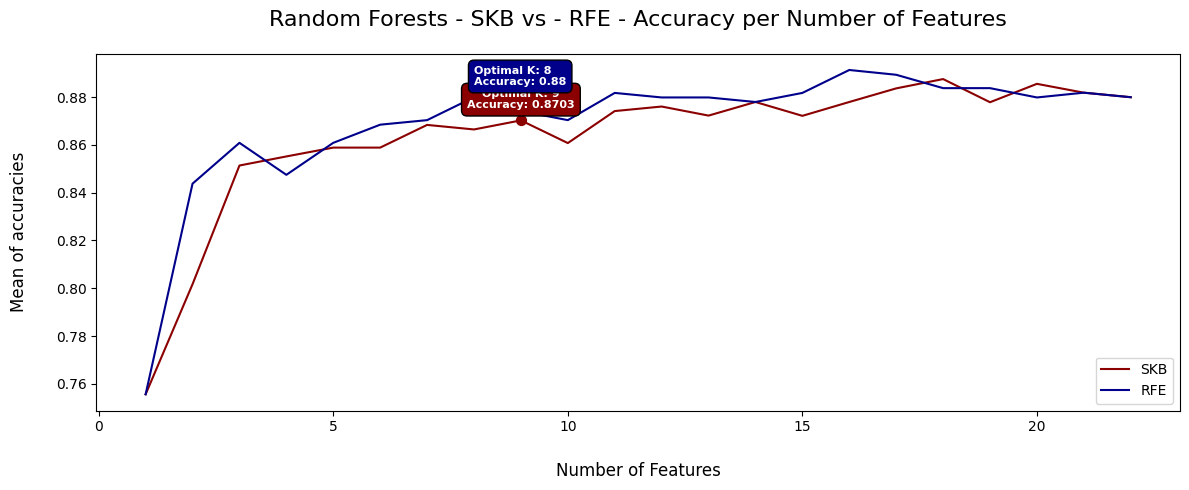

In [7]:
visualization.k_accuracy_lineplot('Random Forests', rf_skb_accuracies, rf_rfe_accuracies, 9, 8)

Con **features_selection()**, salviamo quali sono le Features più significative, per SKB ed RFE, con Random Forests.

In [8]:
rf_skb_selected_features = feature_selection.feature_selection('skb', random_forests, rf_X_train, y_train_smote, 9)
rf_rfe_selected_features = feature_selection.feature_selection('rfe', random_forests, rf_X_train, y_train_smote, 8)

Con **features_selection_venn_diagram()**, visualizziamo quali sono le Features selezionate sia da SKB che da RFE, in modo da ottenere un'idea sulle Features più significative.

Le features selezionate da entrambi gli algoritmi sono:
- **Riserve utili su attivo totale**
- **Debito totale/ Patrimonio netto totale**
- **Capitale proprio/Passività**
- **Tasso di flusso di cassa**


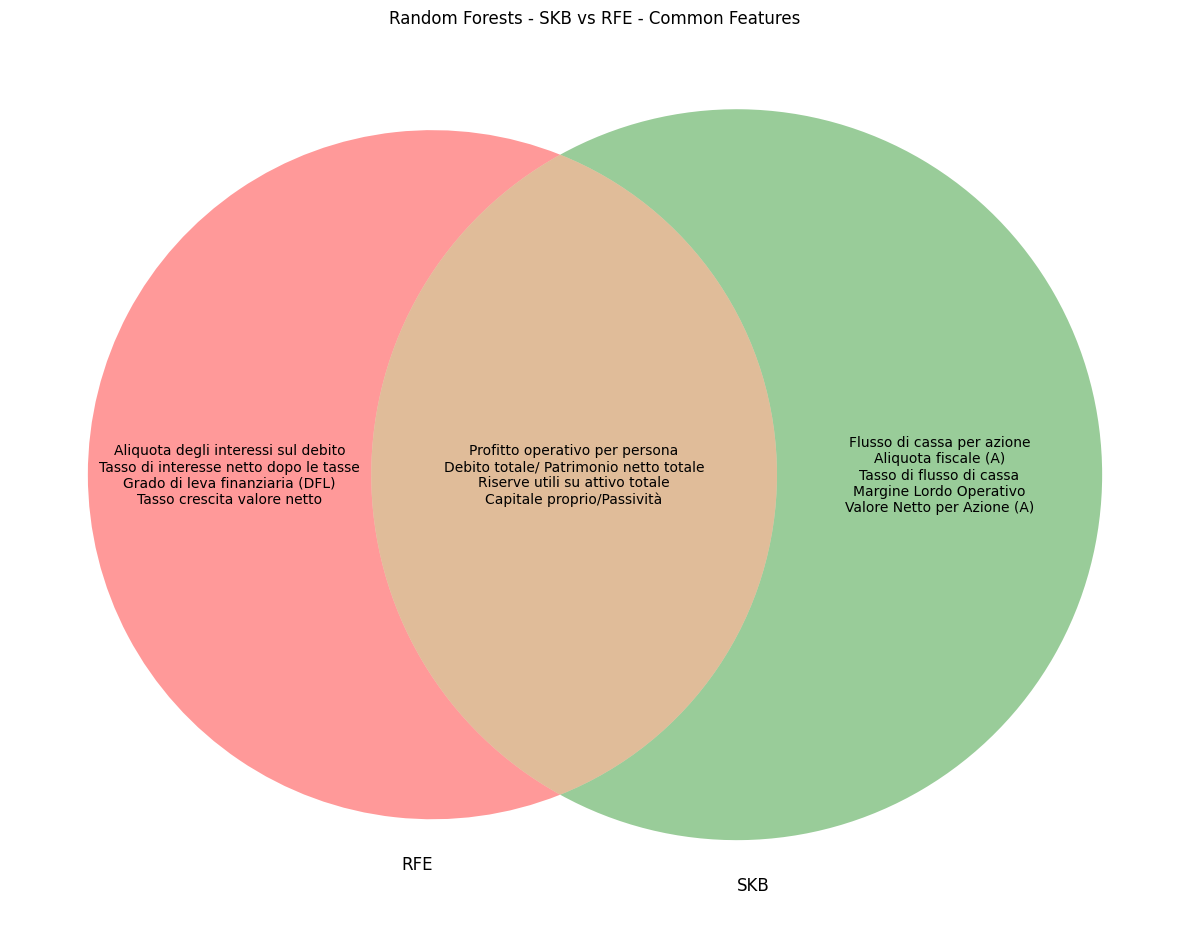

In [9]:
visualization.features_selection_venn_diagram('Random Forests', rf_skb_selected_features, rf_rfe_selected_features)

Con **model_accuracy()**, calcoliamo l'accuracy della Random Forests sui dati di Test, con le Features selezionate dai rispettivi algoritmi di Feature Selection, e salviamo le rispettive previsioni (**y_pred**):
- **SKB** - Test Accuracy: **0.8108**
- **RFE** - Test Accuracy: **0.8243**

Confrontando le accuracy, possiamo affermare che le Features selezionate da **RFE** sono quelle che aumentano il potere predittivo del modello.

In [10]:
# SKB
rf_skb_y_pred, rf_skb_y_proba, rf_skb_accuracy = classification_model.model_accuracy(random_forests, rf_skb_selected_features, rf_X_test[rf_skb_selected_features.columns], y_train_smote, y_test)

Test Accuracy: 0.8108108108108109


In [11]:
# RFE
rf_rfe_y_pred, rf_rfe_y_proba, rf_rfe_accuracy = classification_model.model_accuracy(random_forests, rf_rfe_selected_features, rf_X_test[rf_rfe_selected_features.columns], y_train_smote, y_test)

Test Accuracy: 0.8243243243243243


Con **confusion_matrix_heatmap_comparison()**, visualizziamo la **matrice di confusione** della Random Forests, divisa per SKB ed RFE.

**SKB**:
- **True Negatives** (**0**): il modello ha indovinato **32** compagnie che non vanno in bancarotta
- **False Positives** (**1**): il modello ha classificato **5** compagnie non in bancarotta come se andassero in bancarotta
- **False Negatives** (**0**): il modello ha classificato **9** compagnie in bancarotta come se non andassero in bancarotta
- **True Positives** (**1**): il modello ha indovinato **28** compagnie che vanno in bancarotta

**RFE**:
- **True Negatives** (**0**): il modello ha indovinato **30** compagnie che non vanno in bancarotta
- **False Positives** (**1**): il modello ha classificato **7** compagnie non in bancarotta come se andassero in bancarotta
- **False Negatives** (**0**): il modello ha classificato **6** compagnie in bancarotta come se non andassero in bancarotta
- **True Positives** (**1**): il modello ha indovinato **31** compagnie che vanno in bancarotta

In [12]:
# Calcolo la matrice di confusione sul Test Set sia per SKB che RFE
rf_skb_conf_matrix = confusion_matrix(y_test, rf_skb_y_pred)
rf_rfe_conf_matrix = confusion_matrix(y_test, rf_rfe_y_pred)

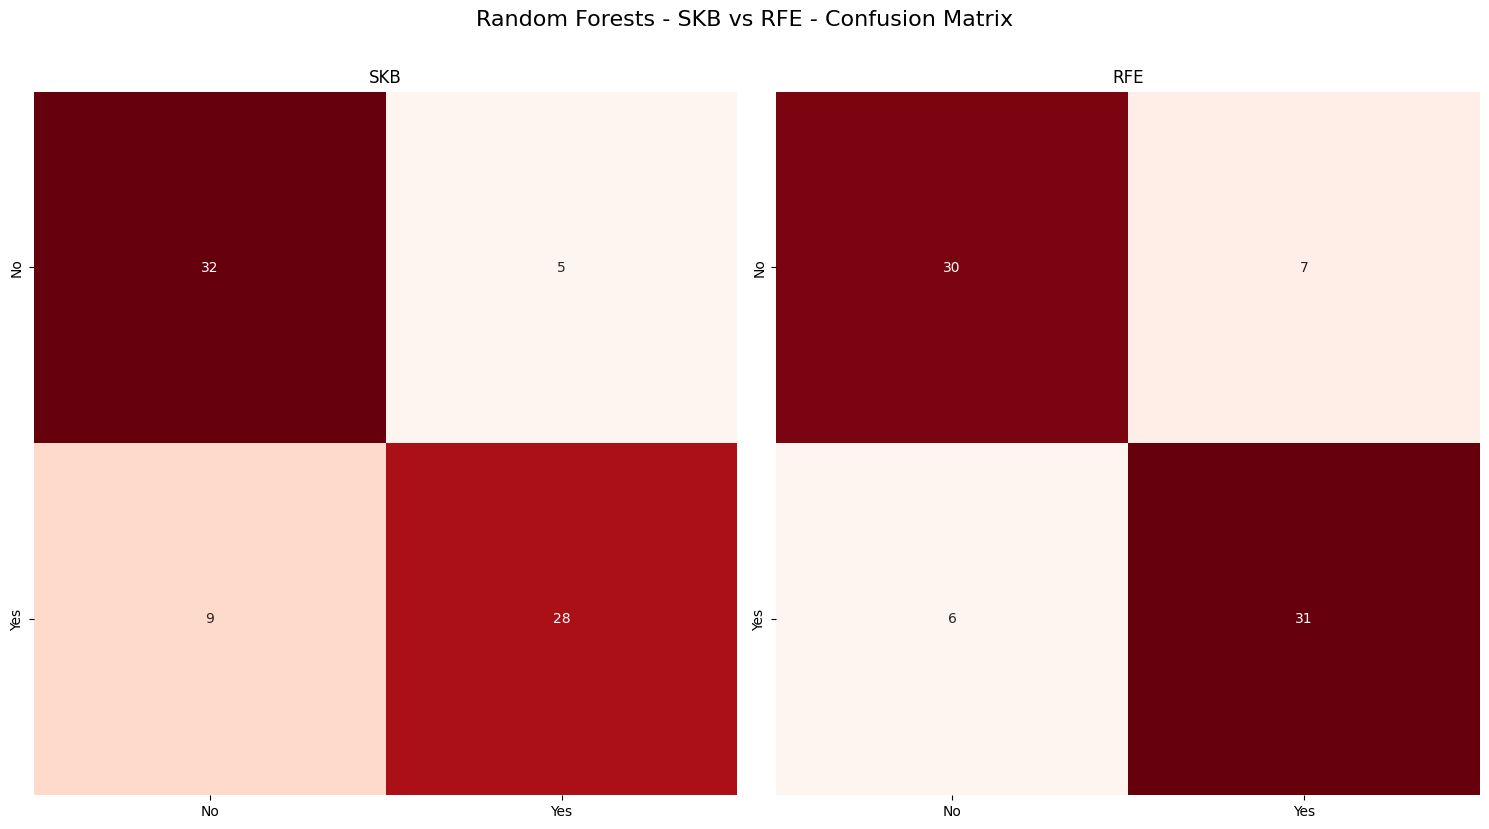

In [13]:
visualization.confusion_matrix_heatmap_comparison('Random Forests', rf_skb_conf_matrix, rf_rfe_conf_matrix)

Con **conf_matrix_coefficients_analysis()**, analizziamo i **coefficienti** della matrice di confusione divisa per SKB ed RFE. Confrontando gli output:
- **Precisione**: tra le compagnie classificate come in bancarotta, **SKB** riesce a indovinare meglio i casi corretti rispetto a SKB, con un tasso di successo dell'**84%** (**0.84** vs **0.81**)
- **Recall**: tra le compagnie effettivamente in bancarotta, **RFE** è decisamente migliore di SKB nell'indovinare correttamente i casi, con un tasso di successo dell'**83%** (**0.83** vs **0.75**) 
- **F1-score**: **RFE** ha un maggiore equilibrio tra Precisione e Recall, suggerendo che riesce a distinguere meglio di SKB tra le compagnie in bancarotta e quelle non in bancarotta (**0.82 vs 0.80**), 
- **Specificità**: **SKB** riesce a classificare di SKB le compagnie che non vanno in bancarotta, indovinando l'**86% dei casi** (**0.86** vs **0.81**)

Ricordando che l'obiettivo di questa analisi è quello di **prevedere le compagnie che vanno in bancarotta**, **RFE** risulta essere il modello migliore, poiché ha **Recall** e **F1-score migliori**.

In [14]:
# Calcolo i coefficienti della Matrice di Confusione per la Random Forests  con SKB
skb_rf_precision, skb_rf_recall, skb_rf_f1, skb_rf_tn, skb_rf_fp, skb_rf_fn, skb_rf_tp, skb_rf_specificity = classification_model.conf_matrix_coefficients_analysis(y_test, rf_skb_y_pred, rf_skb_conf_matrix)

Precisione: 0.8484848484848485
Recall: 0.7567567567567568
F1-score: 0.8
Specificità: 0.8648648648648649


In [15]:
# Calcolo i coefficienti della Matrice di Confusione per la Random Forests  con SKB
rfe_rf_precision, rfe_rf_recall, rfe_rf_f1, rfe_rf_tn, rfe_rf_fp, rfe_rf_fn, rfe_rf_tp, rfe_rf_specificity = classification_model.conf_matrix_coefficients_analysis(y_test, rf_rfe_y_pred, rf_rfe_conf_matrix)

Precisione: 0.8157894736842105
Recall: 0.8378378378378378
F1-score: 0.8266666666666667
Specificità: 0.8108108108108109


Con **conf_matrix_coefficients_to_df()**, creiamo un **dataframe per le metriche della matrice di confusione**, divise per SKB ed RFE. Questo dataframe, ci torna utile nel passaggio successivo per costruire una **visualizzazione grafica**.

In [16]:
rf_conf_matrix_coefficients_df = feature_selection.conf_matrix_coefficients_to_df(
    [skb_rf_precision, rfe_rf_precision],
    [skb_rf_recall, rfe_rf_recall],
    [skb_rf_f1, rfe_rf_f1],
    [skb_rf_specificity, rfe_rf_specificity]
)

Con **conf_matrix_coefficients_barplot**, visualizziamo tramite barplot le metriche della matrice di confusione, per Random Forests, divise per SKB ed RFE.

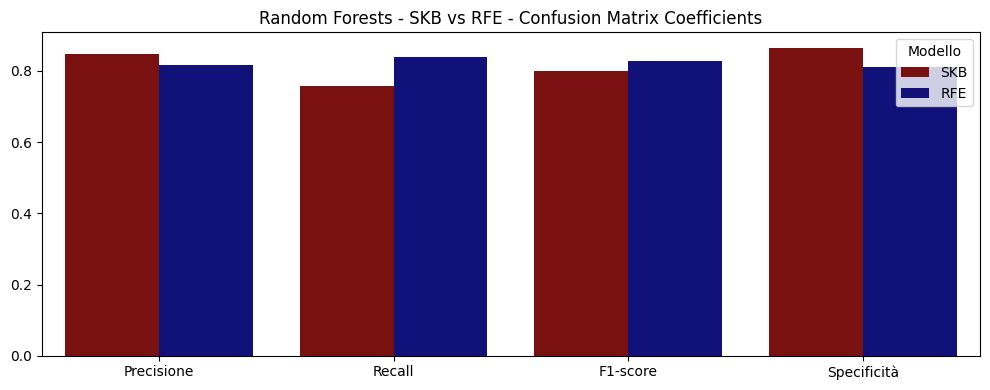

In [17]:
visualization.conf_matrix_coefficients_barplot('Random Forests', rf_conf_matrix_coefficients_df)

Con **model_auc_roc_gini()**, calcoliamo l'**AUC-ROC** e l'**Indice di Gini** della Random Forests, diviso per SKB ed RFE. 

Dall'output, possiamo confermare definitivamente che il **modello con le Features selezionate da RFE** è quello migliore, poiché riporta anche una **maggiore capacità di distinzione tra le classi del Target** rispetto a SKB, anche se la differenza tra i due non è granché (**0.82** vs **0.81** e **0.64** vs **0.62**).

In [18]:
rf_skb_auc, rf_skb_gini = classification_model.model_auc_roc_gini('RF SKB', rf_skb_y_pred, y_test)
rf_rfe_auc, rf_rfe_gini = classification_model.model_auc_roc_gini('RF RFE', rf_rfe_y_pred, y_test)

RF SKB - AUC-ROC: 0.8108108108108109
RF SKB - Indice di Gini: 0.6216216216216217
RF RFE - AUC-ROC: 0.8243243243243242
RF RFE - Indice di Gini: 0.6486486486486485


Con **roc_curve_plot()**, visualizziamo graficamente la **curva ROC** della Random Forests, diviso per SKB ed RFE.

Anche graficamente otteniamo la conferma della superiorità del modello con **RFE**.

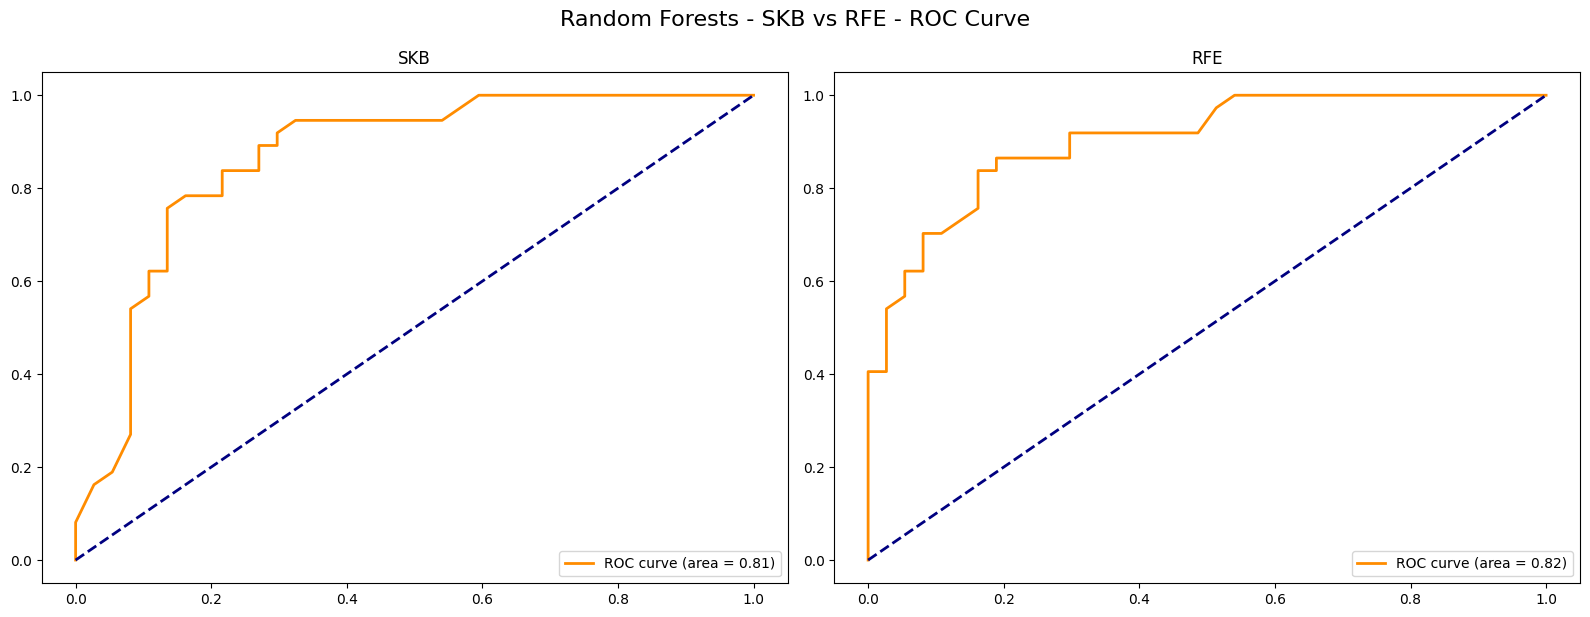

In [19]:
visualization.roc_curve_plot('Random Forests', y_test, rf_skb_y_proba, rf_rfe_y_proba, rf_skb_auc, rf_rfe_auc)

Con **tune_rf_hyperparameters()**, andiamo a ottimizzare gli iper-parametri di Random Forests, con le Features selezionate da **RFE**, utilizzando la tecnica di **Grid Search** combinata con **K-Fold Cross-validation**, al fine di massimizzare ulteriormente le performance del modello, migliorando la generalizzazione sui dati di test.

In particolare, eseguiamo la **Grid Search** per trovare la **combinazione ottimale** degli iper-parametri di Random Forests e, con un **Cross-validation** a **5 Fold**, valutiamo qual è il miglior modello sulla base dell'**accuracy**.

Gli iperparametri che andiamo a ottimizzare sono i seguenti:
- **Number of Estimators**: indica il **numero di alberi** nel bosco; nel nostro caso, le opzioni sono: **100**, **350** e **500**
- **Max Features**: indica il **numero di Features** da considerare per ogni split; nel nostro caso, corrisponde alla **radice quadrata** o a **log2** del **numero totale di Features**
- **Min Samples Leaf**: indica il **numero minimo di campioni** per un **nodo foglia**; nel nostro caso, le opzioni sono: **2**, **10**, **30**.

Dal risultato, possiamo dire che l'accuracy sui **dati di train** è piuttosto alta (**0.87**).

In [20]:
rf_cv = classification_model.tune_rf_hyperparameters(random_forests, rf_rfe_selected_features, y_train_smote)

Best N. Estimators: 350
Best Max Features: sqrt
Best Min Samples Leaf: 2
Best Accuracy: 0.87985347985348


A questo punto, ricalcoliamo l'accuracy del modello sui **dati di test**.

Dal risultato, notiamo che l'accuracy è leggermente **aumentata** rispetto al modello precedente con **solo RFE** (**0.83** vs **0.82**).

In [21]:
rf_y_pred, rf_y_proba, rf_test_accuracy = classification_model.model_accuracy(rf_cv, rf_rfe_selected_features, X_test[rf_rfe_selected_features.columns], y_train_smote, y_test)

Test Accuracy: 0.8378378378378378


Procediamo a calolare e visualizzare anche la **nuova matrice di confusione** e le **relative metriche** (**Precisione**, **Recall**, **F1-score**, **Specificità**).

In [22]:
# Calcolo nuovamente la matrice di confusione sul Test Set 
rf_conf_matrix = confusion_matrix(y_test, rf_y_pred)

Rispetto a prima:
- **True Negatives** (**0**): aumentano da **30** a **31**
- **False Positives** (**1**): diminuiscono da **7** a **6**
- **False Negatives** (**0**): rimangono **invariati**
- **True Positives** (**1**): rimangono **invariati**

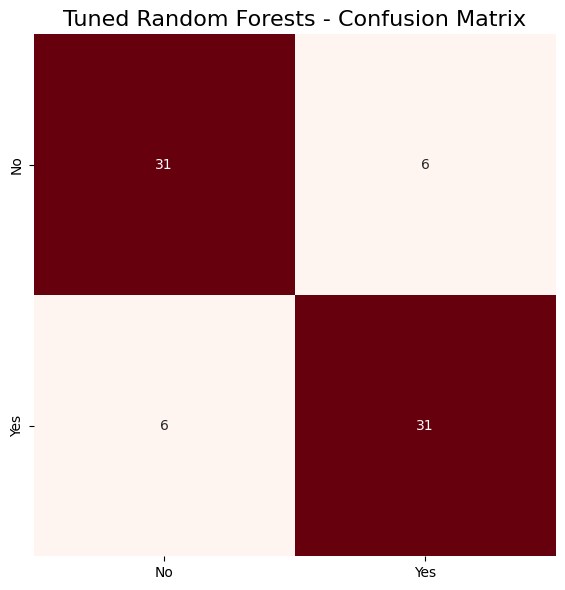

In [23]:
# Visualizzo la nuova matrice di confusione
visualization.confusion_matrix_heatmap('Tuned Random Forests', rf_conf_matrix)

Rispetto a prima:
- **Precisione**: aumenta da **0.81** a **0.83**
- **Recall**: rimane **invariato**
- **F1-score**: aumenta da **0.82** a **0.83**
- **Specificità**: aumenta da **0.81** a **0.83**

Ricordando che l'obiettivo dell'analisi è quello di **prevedere le compagnie in bancarotta**, il modello attuale è migliore, poiché **F1-score** e **Precisione** sono aumentati, anche se di poco.

In [24]:
# Calcolo i coefficienti della nuova Matrice di Confusione
rf_precision, rf_recall, rf_f1, rf_tn, rf_fp, rf_fn, rf_tp, rf_specificity = classification_model.conf_matrix_coefficients_analysis(y_test, rf_y_pred, rf_conf_matrix)

Precisione: 0.8378378378378378
Recall: 0.8378378378378378
F1-score: 0.8378378378378378
Specificità: 0.8378378378378378


Creiamo, tramite barplot, la visualizzazione grafica delle **nuove metriche** della matrice di confusione.

In [25]:
# Creo il dataframe funzionale alla visualizzazione grafica
rf_conf_matrix_coefficients_df = classification_model.conf_matrix_coefficients_to_df(
    rf_precision,
    rf_recall,
    rf_f1,
    rf_specificity
)

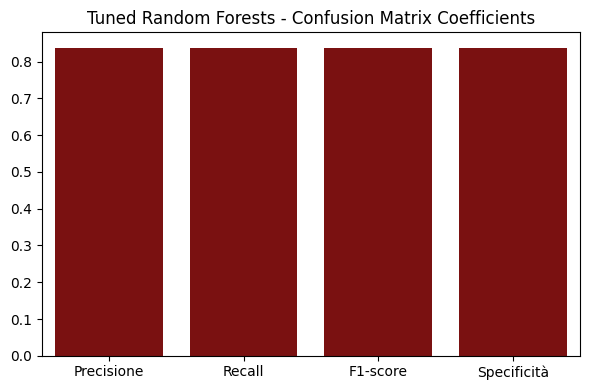

In [26]:
# Visualizzo graficamente le nuove metriche della matrice di confusione
visualization.conf_matrix_coefficients_barplot2('Tuned Random Forests', rf_conf_matrix_coefficients_df)

Per concludere, calcoliamo nuovamente  l'**AUC-ROC** el'**Indice di Gini**, e visualizziamo graficamente la **curva ROC*

Rispetto a prima, l'**AUC-ROC** è aumentato da **0.82** a **0.83**, mentre l'**Indice di Gini** è aumentato da **0.64** a **0.67**. 

Possiamo affermare definitivamente la superiorità del **modello attuale**.

In [27]:
# Calcolo nuovamente AUC-ROC e Indice di Gini
rf_auc, rf_gini = classification_model.model_auc_roc_gini('Random Forests', rf_y_pred, y_test)

Random Forests - AUC-ROC: 0.8378378378378377
Random Forests - Indice di Gini: 0.6756756756756754


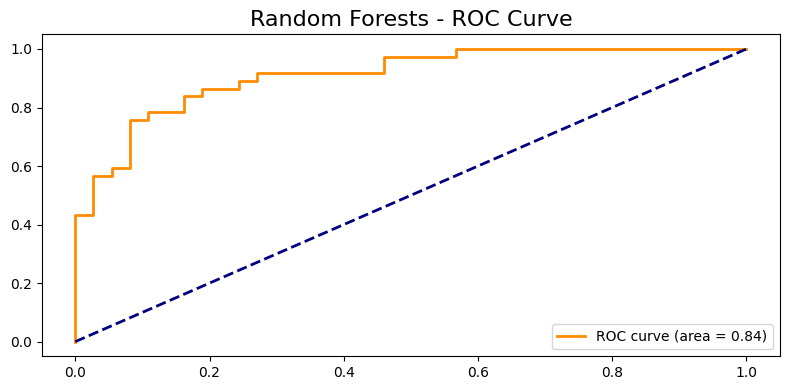

In [28]:
# Visualizzo graficamente la nuova curva ROC
visualization.roc_curve_plot2('Random Forests', y_test, rf_y_proba, rf_auc)

Con **feature_importance_barplot()**, visualizziamo tramite barplot l'ordine di importanza delle Features utilizzate dalla Random Forests.

In [29]:
# Inzializzo il modello con la configurazione ottimale
best_rf = rfc(n_estimators=350, max_features = 'sqrt', min_samples_leaf=2, random_state=42)

In [30]:
# Addestro il modello sui dati di train
best_rf.fit(rf_rfe_selected_features, y_train_smote)  # Usa i tuoi dati di addestramento

RandomForestClassifier(min_samples_leaf=2, n_estimators=350, random_state=42)

In [31]:
# Creo un dataframe con Features e relativa importanzas
rf_feature_importance_df = classification_model.feature_importance_df(best_rf, rf_rfe_selected_features)
rf_feature_importance_df

,Feature,Importance
5,Riserve utili su attivo totale,0.217524
3,Debito totale/ Patrimonio netto totale,0.184596
0,Tasso di interesse netto dopo le tasse,0.145455
7,Capitale proprio/Passività,0.143407
2,Tasso crescita valore netto,0.085720
6,Grado di leva finanziaria (DFL),0.085606
1,Aliquota degli interessi sul debito,0.081519
4,Profitto operativo per persona,0.056174


Dal risultato che otteniamo:
- **Riserve utili su attivo totale** è la Feature **più importante**
- **Profitto operativo per persona** è la Feature **meno significativa**

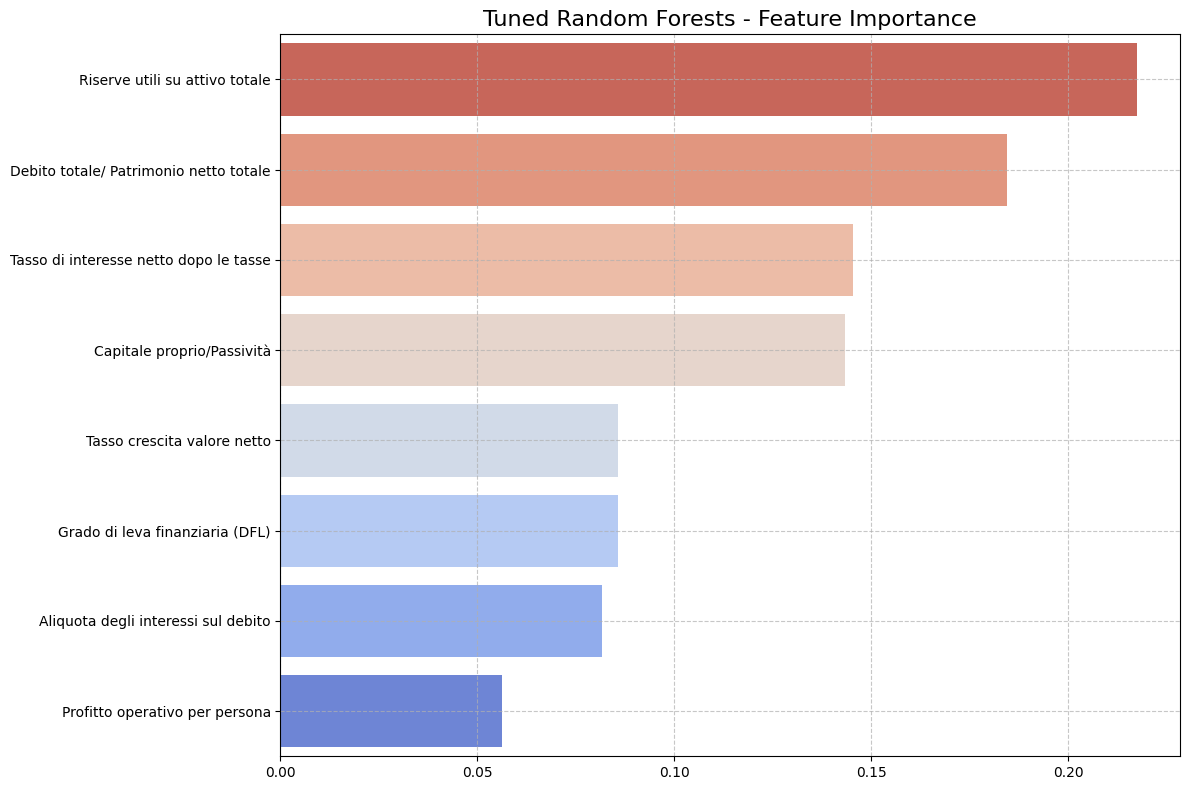

In [32]:
# Visualizzazione grafica
visualization.feature_importance_barplot('Tuned Random Forests', rf_feature_importance_df)